In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [3]:
dataset =pd.read_csv('caravan-insurance-challenge.csv', sep=',')
dataset.shape
# dataset

(9822, 86)

In [4]:
pd.options.display.float_format = "{:.6f}".format
dataset.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.031460,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.209070,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [5]:
dataset.groupby('CARAVAN').size()

CARAVAN
0    9236
1     586
dtype: int64

In [6]:
print('Negatif', round(dataset['CARAVAN'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Positif', round(dataset['CARAVAN'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Negatif 94.03 % of the dataset
Positif 5.97 % of the dataset


In [7]:
negatif_data = dataset.loc[dataset['CARAVAN']==0]
positif_data = dataset.loc[dataset['CARAVAN']==1]

all_data = pd.concat([negatif_data, positif_data])
all_data.shape

X = all_data.drop('CARAVAN', axis=1)
y = all_data['CARAVAN']

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 ,random_state=42)


print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train), Counter(y_test)))
print (X_train.shape)
print(X_test.shape)

Rincian class pada data training Counter({0: 7394, 1: 463}) dan testing Counter({0: 1842, 1: 123}) 
(7857, 85)
(1965, 85)


In [9]:
X_train['CARAVAN'] = y_train
negatif = X_train.loc[X_train['CARAVAN']==0]
positif = X_train.loc[X_train['CARAVAN']==1]

negatif_points = negatif.drop('CARAVAN', axis = 1)
positif_points = positif.drop('CARAVAN', axis = 1)

negatif_points=np.array(negatif_points)
positif_points = np.array (positif_points)

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
from scipy.spatial import distance
Y = distance.cdist(positif_points, negatif_points, 'euclidean')

#mengurutkan hasil secara ascending
K = np.argsort(Y)
# print (Y)
# print ("Urutan data: \n", K)
Y.sort()
# print ("After short: \n", Y)
Y.shape

(463, 7394)

In [11]:
array_new = np.array(negatif_points[K[:,0:3]])
print (array_new.shape)
XX= array_new.transpose(0,1,2).reshape(array_new.shape[0]*array_new.shape[1],array_new.shape[2])
zeros_value = np.zeros((array_new.shape[0]*array_new.shape[1],1))
# print (ones_value.shape)
new_X = np.concatenate ((XX, zeros_value), axis=1)

# print (new_X.shape)
new_X= np.unique(new_X,axis=0)
print (new_X.shape)

(463, 3, 85)
(953, 86)


In [12]:
array_minority = np.array(positif)
joined_resampling = np.concatenate((array_minority,new_X), axis=0)

X_resample = joined_resampling[:,0:85]
X_resample=X_resample.astype(np.float32)
# print (X.dtype)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_resample = st.fit_transform(X_resample)

y_resample = joined_resampling[:,85]
y_resample=y_resample.astype(np.float32)
print (y_resample)

# print (X.shape)
# print (y.shape)
print ('Setelah undersampling, komponen data: {}' .format(Counter(y_resample)))

[1. 1. 1. ... 0. 0. 0.]
Setelah undersampling, komponen data: Counter({0.0: 953, 1.0: 463})


In [13]:
X_test['CARAVAN'] = y_test
negatif2 = X_test.loc[X_test['CARAVAN']==0]
positif2 = X_test.loc[X_test['CARAVAN']==1]

negatif_points2 = negatif2.drop('CARAVAN', axis = 1)
positif_points2 = positif2.drop('CARAVAN', axis = 1)

negatif_points2=np.array(negatif_points2)
positif_points2 = np.array (positif_points2)
# print(benign_points2.shape)
zeros_value2 = np.zeros((negatif_points2.shape[0],1))

new_negatif = np.concatenate((negatif_points2, zeros_value2), axis=1)

array_minority2 = np.array(positif2)
joined_testing =np.concatenate ((array_minority2, new_negatif), axis =0)

X_test_new = joined_testing[:,0:85].astype(np.float32)
st = StandardScaler()
X_test_new = st.fit_transform(X_test_new)
y_test_new = joined_testing[:,85].astype(np.float32)

print (X_test_new.shape)
print ("Rincian class pada data  testing {} " .format(Counter(y_test_new)))

(1965, 85)
Rincian class pada data  testing Counter({0.0: 1842, 1.0: 123}) 


C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
svm = SVC(gamma=1.5, kernel='rbf', C=1)
svm.fit(X_resample,y_resample)
X_resample.shape

(1416, 85)

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_resample)
conf_matrix_train = confusion_matrix(y_resample, y_pred)
print (conf_matrix_train)
# print (X.shape)
print (classification_report(y_resample, y_pred))
G_mean = geometric_mean_score(y_resample, y_pred)
print (G_mean)

[[947   6]
 [110 353]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       953
         1.0       0.98      0.76      0.86       463

   micro avg       0.92      0.92      0.92      1416
   macro avg       0.94      0.88      0.90      1416
weighted avg       0.92      0.92      0.92      1416

0.870413055288374


In [16]:
svm.fit (X_test_new, y_test_new)
y_pred_test = svm.predict(X_test_new)
conf_matrix_test = confusion_matrix(y_test_new, y_pred_test)
print (conf_matrix_test)
# print (X_test.dtype)
print(classification_report(y_test_new, y_pred_test))
G_mean_test = geometric_mean_score (y_test_new, y_pred_test)
print (G_mean_test)

[[1841    1]
 [  11  112]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1842
         1.0       0.99      0.91      0.95       123

   micro avg       0.99      0.99      0.99      1965
   macro avg       0.99      0.96      0.97      1965
weighted avg       0.99      0.99      0.99      1965

0.9539783899544727


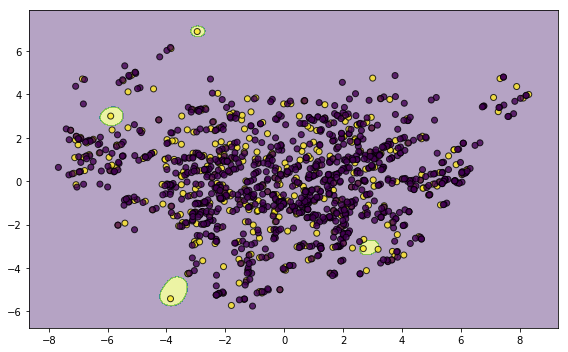

In [17]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1,figsize=(8,5))

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_resample)

classifier = svm.fit(Xreduced, y_resample)
plot_decision_function(Xreduced,y_resample, classifier, ax)
fig.tight_layout()

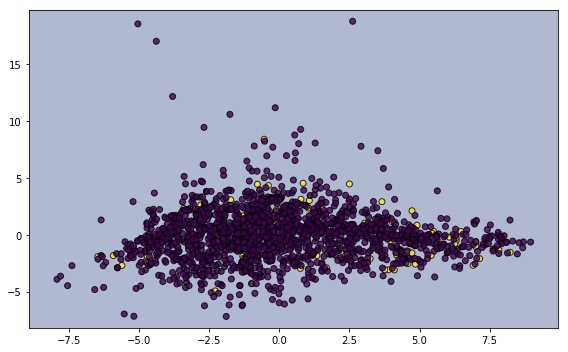

In [18]:
fig, ax = plt.subplots(1,figsize=(8,5))

pca = PCA(n_components=2)
Xreduced_test = pca.fit_transform(X_test_new)

classifier = svm.fit(Xreduced_test, y_test_new)
plot_decision_function(Xreduced_test,y_test_new, classifier, ax)
fig.tight_layout()